In [1]:
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline
from datetime import datetime

filename = "shortened.csv"

#create sample dataframe 
global_temp_city  = pd.read_csv(filename).dropna()

#format dt column to be a datetime value 
global_temp_city['dt'] =  pd.to_datetime(global_temp_city['dt'])

#how to retrieve month, year from date
#print global_temp_city['dt'][0].date().month
#print global_temp_city['dt'][0].date().year

global_temp_city[:6]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01 00:00:00,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01 00:00:00,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01 00:00:00,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01 00:00:00,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01 00:00:00,16.082,1.396,Århus,Denmark,57.05N,10.33E
10,1744-09-01 00:00:00,12.781,1.454,Århus,Denmark,57.05N,10.33E


In [2]:
#create dictionary to hodl temp for each year

#first create dictionary to hold temp recorded in each country by year 
#yearly_temp= {}

    
#for index, row in global_temp_city.iterrows():
    #year = row['dt'].year
    #if year in yearly_temp:
        #yearly_temp[year].append(row['AverageTemperature'])
    #else:
        #yearly_temp[year]= [row['AverageTemperature']]

#average_yearly_temp = {}

#for keys in yearly_temp:
    #average_temp = sum(yearly_temp[keys])/len(yearly_temp[keys])
    #average_yearly_temp[keys] = average_temp

#print '1743'
#print yearly_temp[1743]
#print average_yearly_temp[1743]



In [3]:
# don't need because I used a lambda instead
# lambda x: x.date().year is equivalent to this function
def getYear(datetimeObj):
    return datetimeObj.date().year

In [4]:
def getAvgYear(year):
    return average_yearly_temp[year]

In [5]:
#create new column for year and average temp for each year 
global_temp_city['year']= global_temp_city['dt'].map(lambda x: x.date().year)
#global_temp_city['AvgTempYear']= global_temp_city['year'].map(getAvgYear)
global_temp_city[1000:1005]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
1072,1833-03-01 00:00:00,0.773,2.863,Århus,Denmark,57.05N,10.33E,1833
1073,1833-04-01 00:00:00,4.524,1.848,Århus,Denmark,57.05N,10.33E,1833
1074,1833-05-01 00:00:00,13.180,1.665,Århus,Denmark,57.05N,10.33E,1833
1075,1833-06-01 00:00:00,15.264,2.315,Århus,Denmark,57.05N,10.33E,1833
1076,1833-07-01 00:00:00,16.940,1.661,Århus,Denmark,57.05N,10.33E,1833


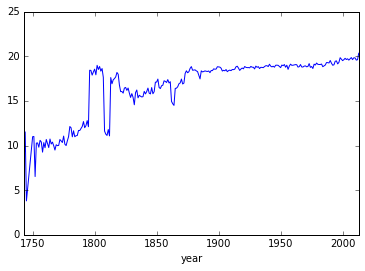

In [6]:
# average temperatures for different years
yearlyAvgTemps = global_temp_city.groupby('year')['AverageTemperature'].mean()
# create datafram with info
yearlyAvgTempsDF = DataFrame({'avgTemp':yearlyAvgTemps.values,\
                              'year':yearlyAvgTemps.index.values})
yearlyAvgTemps.plot(kind="line")

In [7]:
# add city, country column to main DF
global_temp_city["city_country"] = global_temp_city["City"] \
        +", "+global_temp_city['Country']

In [8]:
# merge original dataframe with yearly averages dataframe
global_temp_city_w_yrlyAvg = pd.merge(global_temp_city, yearlyAvgTempsDF,\
                          left_on = 'year', right_on = 'year',\
                           suffixes=['_alldata','avgYearTemps'])
#global_temp_city_w_yrlyAvg[:10]


In [10]:
# average temperatures for all years for different cities
cityAvgTempsAllYrs = global_temp_city.groupby(['city_country','Latitude','Longitude'])['AverageTemperature'].mean()

#create dataframe with information (because series suck)
cityAvgTempsAllYrsDF = DataFrame({'temporary':cityAvgTempsAllYrs.index.values,\
                           'avgTemp':cityAvgTempsAllYrs.values})
cityAvgTempsAllYrsDF['city_country'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[0])
cityAvgTempsAllYrsDF['lat'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[1])
cityAvgTempsAllYrsDF['long'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[2])
cityAvgTempsAllYrsDF = cityAvgTempsAllYrsDF.drop('temporary', 1)          


print cityAvgTempsAllYrsDF[:10]

     avgTemp               city_country     lat     long
0  13.147277            A Coruña, Spain  42.59N    8.73W
1   8.825173            Aachen, Germany  50.63N    6.34E
2   7.695135           Aalborg, Denmark  57.05N   10.33E
3  26.612824               Aba, Nigeria   5.63N    8.07E
4  25.034749               Abadan, Iran  29.74N   48.00E
5  26.612824         Abakaliki, Nigeria   5.63N    8.07E
6  -0.551814             Abakan, Russia  53.84N   91.36E
7   7.261619         Abbotsford, Canada  49.03N  122.45W
8  26.418886  Abengourou, Côte D'Ivoire   7.23N    4.05W
9  26.373105          Abeokuta, Nigeria   7.23N    4.05E


In [12]:
# average temperatures each year for different cities
cityAvgTempsEachYr = global_temp_city.groupby(['city_country','Latitude','Longitude','year'])['AverageTemperature'].mean()

#create dataframe with information (because series suck)
cityAvgTempsEachYrDF = DataFrame({'temporary':cityAvgTempsEachYr.index.values,\
                           'avgTemp':cityAvgTempsEachYr.values})
cityAvgTempsEachYrDF['city_country'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[0])
cityAvgTempsEachYrDF['lat'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[1])
cityAvgTempsEachYrDF['long'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[2])
cityAvgTempsEachYrDF['year'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[3])
cityAvgTempsEachYrDF = cityAvgTempsEachYrDF.drop('temporary', 1)          


print cityAvgTempsEachYrDF[:10]

     avgTemp     city_country     lat   long  year
0  10.779000  A Coruña, Spain  42.59N  8.73W  1743
1  13.678125  A Coruña, Spain  42.59N  8.73W  1744
2   9.170500  A Coruña, Spain  42.59N  8.73W  1745
3  13.489273  A Coruña, Spain  42.59N  8.73W  1750
4  13.698500  A Coruña, Spain  42.59N  8.73W  1751
5  10.771333  A Coruña, Spain  42.59N  8.73W  1752
6  13.151833  A Coruña, Spain  42.59N  8.73W  1753
7  13.221000  A Coruña, Spain  42.59N  8.73W  1754
8  12.906000  A Coruña, Spain  42.59N  8.73W  1755
9  13.255500  A Coruña, Spain  42.59N  8.73W  1756


In [19]:

# create pivottable/timeseries
date_city_pivot = pd.pivot_table(cityAvgTempsEachYrDF,\
                                index='year',\
                                columns='city_country')
date_city_pivot[:10]

avgTemp                                                \
city_country A Coruña, Spain Aachen, Germany Aalborg, Denmark Aba, Nigeria   
year                                                                         
1743               10.779000        6.425000         6.068000          NaN   
1744               13.678125       10.090125         9.007125          NaN   
1745                9.170500        2.550750         0.026500          NaN   
1750               13.489273        9.702273         8.725545          NaN   
1751               13.698500        9.515750         8.046375          NaN   
1752               10.771333        5.275333         4.090833          NaN   
1753               13.151833        8.782750         7.418667          NaN   
1754               13.221000        8.452167         7.327083          NaN   
1755               12.906000        8.201250         7.082833          NaN   
1756               13.255500        8.794750         7.776833          NaN   

                                                             \
city_country Abadan, Iran Abakaliki, Nigeria Abakan, Russia   
year                                                          
1743                  NaN                NaN            NaN   
1744                  NaN                NaN            NaN   
1745                  NaN                NaN            NaN   
1750                  NaN                NaN            NaN   
1751                  NaN                NaN            NaN   
1752                  NaN                NaN            NaN   
1753                  NaN                NaN            NaN   
1754                  NaN                NaN            NaN   
1755                  NaN                NaN            NaN   
1756                  NaN                NaN            NaN   

                                                                             \
city_country Abbotsford, Canada Abengourou, Côte D'Ivoire Abeokuta, Nigeria   
year                                                                          
1743                        NaN                       NaN               NaN   
1744                        NaN                       NaN               NaN   
1745                        NaN                       NaN               NaN   
1750                        NaN                       NaN               NaN   
1751                        NaN                       NaN               NaN   
1752                        NaN                       NaN               NaN   
1753                        NaN                       NaN               NaN   
1754                        NaN                       NaN               NaN   
1755                        NaN                       NaN               NaN   
1756                        NaN                       NaN               NaN   

                  ...                                                        \
city_country      ...      Alagoinhas, Brazil Alandur, India Alanya, Turkey   
year              ...                                                         
1743              ...                     NaN            NaN            NaN   
1744              ...                     NaN            NaN            NaN   
1745              ...                     NaN            NaN            NaN   
1750              ...                     NaN            NaN            NaN   
1751              ...                     NaN            NaN            NaN   
1752              ...                     NaN            NaN            NaN   
1753              ...                     NaN            NaN            NaN   
1754              ...                     NaN            NaN            NaN   
1755              ...                     NaN            NaN            NaN   
1756              ...                     NaN            NaN            NaN   

                                                                            \
city_country Alappuzha, India Albacete, Spain Århus,

In [33]:
def regressOnYr(s):
    sDF = DataFrame({'year':s.index.values,\
                           'temps':s.values})
    result = pd.ols(x=sDF['year'],y=sDF['temps'])
    return result
    
    

In [46]:
timeOnAvgTempEachCity = date_city_pivot.apply(regressOnYr)

#change to datafram
timeOnAvgTempEachCityDF = DataFrame({'temporary':timeOnAvgTempEachCity.index.values,\
                           'regResults':timeOnAvgTempEachCity.values})
timeOnAvgTempEachCityDF['city_country'] = timeOnAvgTempEachCityDF['temporary'].map(lambda x : x[1])
timeOnAvgTempEachCityDF = timeOnAvgTempEachCityDF.drop('temporary', 1) 

#add relevant regression information to DF
timeOnAvgTempEachCityDF['slope']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.beta['x'])
timeOnAvgTempEachCityDF['Y-intercept']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.beta['intercept'])
timeOnAvgTempEachCityDF['R2']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.r2)
timeOnAvgTempEachCityDF['pval']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.p_value)

timeOnAvgTempEachCityDF


,regResults,city_country,slope,Y-intercept,R2,pval
0,\n-------------------------Summary of Regressi...,"A Coruña, Spain",0.003533,6.485449,0.190892,x 7.140240e-14 intercept 2.47345...
1,\n-------------------------Summary of Regressi...,"Aachen, Germany",0.004201,0.900689,0.138122,x 3.603535e-10 intercept 4.58387...
2,\n-------------------------Summary of Regressi...,"Aalborg, Denmark",0.004473,-0.741463,0.123617,x 3.466823e-09 intercept 5.90568...
3,\n-------------------------Summary of Regressi...,"Aba, Nigeria",0.008980,9.195386,0.562636,x 5.286647e-28 intercept 2.42996...
4,\n-------------------------Summary of Regressi...,"Abadan, Iran",0.010110,5.524804,0.146524,x 1.454853e-07 intercept 1.21623...
5,\n-------------------------Summary of Regressi...,"Abakaliki, Nigeria",0.008980,9.195386,0.562636,x 5.286647e-28 intercept 2.42996...
6,\n-------------------------Summary of Regressi...,"Abakan, Russia",0.009742,-19.222048,0.304126,x 7.872777e-17 intercept 1.39452...
7,\n-------------------------Summary of Regressi...,"Abbotsford, Canada",0.007547,-7.245882,0.269976,x 4.815332e-14 intercept 6.60095...
8,\n-------------------------Summary of Regressi...,"Abengourou, Côte D'Ivoire",0.009352,8.320591,0.654139,x 2.475112e-37 intercept 6.75732...
9,\n-------------------------Summary of Regressi...,"Abeokuta, Nigeria",0.008979,8.958110,0.512126,x 1.614620e-24 intercept 2.34340...
